In [1]:
import sklearn
import numpy as np
import pandas as pd
import re
import preprocessor as pr
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from textblob import TextBlob

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
trn = pd.read_csv("train.csv")

tst = pd.read_csv("test.csv")

In [3]:
trn.head(6)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...


In [4]:
tst.tail(6)

,id,tweet
17191,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [5]:
sum(trn["label"] == 0)

29720

In [6]:
sum(trn["label"] == 1)

2242

In [7]:
trn.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
re_no_space = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [9]:
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = pr.clean(line)
    # remove puctuation
    tmpL = re_no_space.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = re_with_space.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [11]:
trn_tweet = clean_tweets(trn["tweet"])
trn_tweet = pd.DataFrame(trn_tweet)

In [12]:
trn["clean_tweet"] = trn_tweet
trn.head(5)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now


In [13]:
tst_tweet = clean_tweets(tst["tweet"])
tst_tweet = pd.DataFrame(tst_tweet)
tst["clean_tweet"] = tst_tweet
tst.tail()

,id,tweet,clean_tweet
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left right polarisation &gt3
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,today in omg &amp used words like assets&ampli...
17195,49158,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...
17196,49159,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download


In [14]:
y = trn.label.values
x_trn, x_tst, y_trn, y_tst = train_test_split(trn.clean_tweet.values, y,stratify=y,random_state=1, test_size=0.3,shuffle=True)

In [15]:
#making the words into matrix form
doc = ["Hi this is a sample testing text",
       "This is done to check the output"]
vectorizer = CountVectorizer()

document_term_matrix = vectorizer.fit_transform(doc)

pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names())

,check,done,hi,is,output,sample,testing,text,the,this,to
0,0,0,1,1,0,1,1,1,0,1,0
1,1,1,0,1,1,0,0,0,1,1,1


In [17]:
def sub(text):
    return TextBlob(text).sentiment.subjectivity

def pol(text):
    return TextBlob(text).sentiment.polarity

tst['Subjectivity']=tst['tweet'].apply(sub)
tst['Polarity']=tst['tweet'].apply(pol)

tst.head(5)

,id,tweet,clean_tweet,Subjectivity,Polarity
0,31963,#studiolife #aislife #requires #passion #dedic...,to find,0.000000,0.000000
1,31964,@user #white #supremacists want everyone to s...,want everyone to see the new and heres why,0.227273,0.068182
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your,0.500000,0.781250
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,1.000000,0.500000
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd to my amazing hilarious eli ahmir uncle dav...,0.633333,0.408333


In [18]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
tst["Analysis"]=tst["Polarity"].apply(analysis)    
tst.head(5)


,id,tweet,clean_tweet,Subjectivity,Polarity,Analysis
0,31963,#studiolife #aislife #requires #passion #dedic...,to find,0.000000,0.000000,Neutral
1,31964,@user #white #supremacists want everyone to s...,want everyone to see the new and heres why,0.227273,0.068182,Positive
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your,0.500000,0.781250,Positive
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,1.000000,0.500000,Positive
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd to my amazing hilarious eli ahmir uncle dav...,0.633333,0.408333,Positive


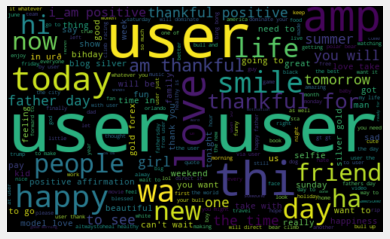

In [19]:
words = ' '.join([twts for twts in trn['tweet']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=120).generate(words)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

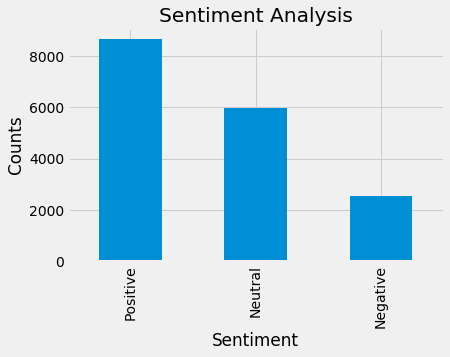

In [20]:
tst["Analysis"].value_counts()
 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tst["Analysis"].value_counts().plot(kind='bar')
plt.show

In [21]:
vectorizer = CountVectorizer(binary=True, stop_words='english')

vectorizer.fit(list(x_trn) + list(x_tst))

x_train_vec = vectorizer.transform(x_trn)
x_test_vec = vectorizer.transform(x_tst)

In [22]:
svm = svm.SVC(kernel ='linear', probability=True)

prob = svm.fit(x_train_vec, y_trn).predict_proba(x_test_vec)

y_pred_svm = svm.predict(x_test_vec)

In [23]:
print("Accuracy score for SVC is: ", accuracy_score(y_tst, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  94.86912086766085 %
